# Prosper Loan Data
## by Ukasoanya Favour

## Introduction
> The Prosper Loan dataset contains information of loans issued by the Prosper company.



## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Let's see the shape of the ProsperLoan data
df.shape

(113937, 81)

In [6]:
# let's check for duplicates in the dataset
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [9]:
# Convert LoanStatus, CreditGrade and ProsperRating (Alpha) to ordered category

feature_orders = {'LoanStatus':['Cancelled', 'Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)',
                                'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
                                'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted'],
                 'CreditGrade':['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                 'ProsperRating (Alpha)':['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}

for col in feature_orders:
    cat_type = pd.api.types.CategoricalDtype(ordered=True, categories=feature_orders[col])
    df[col] = df[col].astype(cat_type)

In [10]:
# Convert date columns to proper type

dates = ['LoanOriginationDate', 'FirstRecordedCreditLine', 'DateCreditPulled']
for date in dates:
    df[date] = pd.to_datetime(df[date])

### What is the structure of your dataset?

> My data is a loan dataset with different 113937 entries and 81 features

### What is/are the main feature(s) of interest in your dataset?

> I am interested in visalising how other features correlate with interest rate (BorrowerRate) and loan amount (LoanOriginalAmount).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe parameters like the Prosper rating/score, Credit rating/score, Dept to Income ratio, Monthly income, Home ownership status - would be telling indicators.

## Univariate Exploration

> In this section, I'll investigate distributions of individual variables. If
I see unusual points or outliers, I'll take a deeper look to clean things up
and prepare myself to look at relationships between variables.

In [11]:
# Set a color list
color_stream = sb.color_palette()

Let's visualise the distribution of the `BorrowerRate` and the `BorrowerAPR`

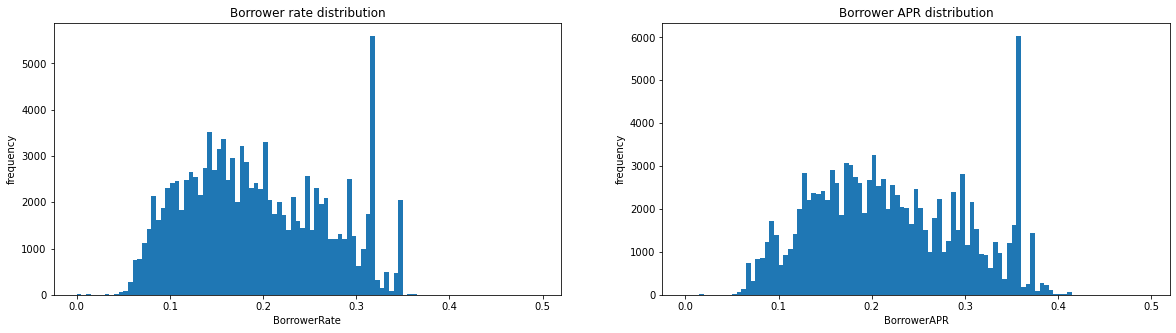

In [12]:
br_max = df['BorrowerRate'].max()
bins = np.arange(0, br_max, 0.005)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(df['BorrowerRate'], bins=bins)
plt.xlabel('BorrowerRate')
plt.ylabel('frequency')
plt.title('Borrower rate distribution')

plt.subplot(1, 2, 2)
plt.hist(df['BorrowerAPR'], bins=bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('frequency')
plt.title('Borrower APR distribution');

#### Observation
Both `BorrowerRate` and `BorrowerAPR` initially appear to ba a normal distribution until a sudden spike in frequency is observed at about 0.32 for the formeer and 0.36 for the latter.

Let's visualise the distribution of the `ProsperRating`, `ProsperScore` and `CreditGrade` values throughout the dataset

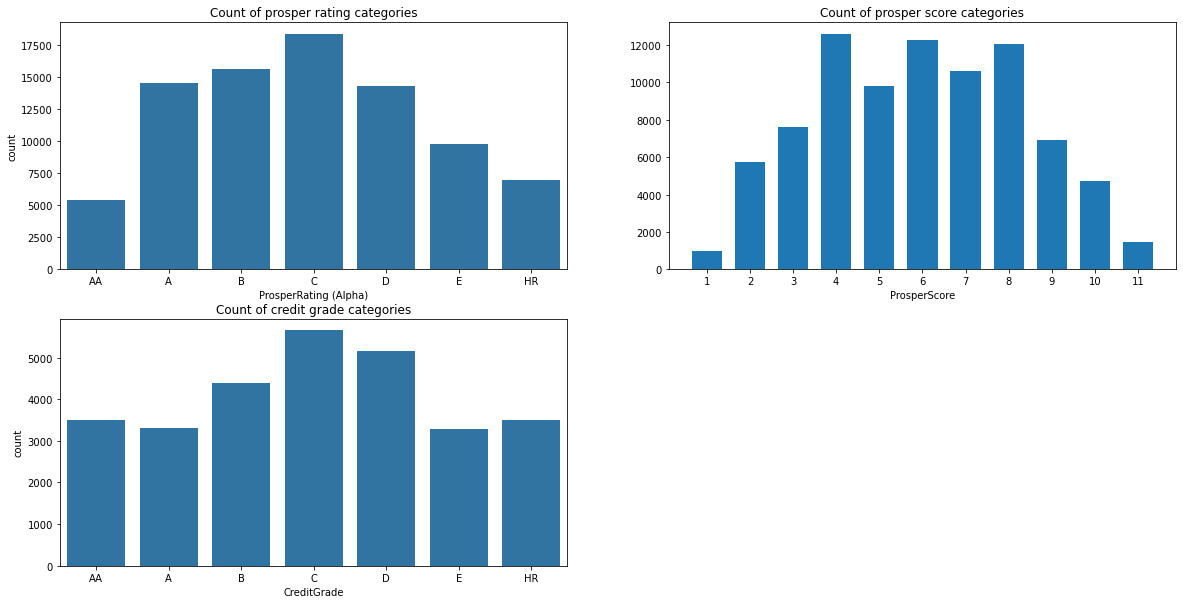

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
sb.countplot(data=df,  x='ProsperRating (Alpha)', color=color_stream[0])
plt.title('Count of prosper rating categories')

plt.subplot(2, 2, 3)
sb.countplot(data=df,  x='CreditGrade', color=color_stream[0])
plt.title('Count of credit grade categories')

plt.subplot(2, 2, 2)
ps_max = df['ProsperScore'].max()
bins = np.arange(0.5, ps_max+1.5, 1)
plt.hist(df['ProsperScore'], bins=bins, rwidth=0.7)
plt.xticks(np.arange(1, ps_max+1, 1))
plt.xlabel('ProsperScore')
plt.title('Count of prosper score categories')

plt.show()

#### Observation
The CreditGrade feature (Pre 2009 ratings) seems fairly evenly distributed while the ProsperRating (post 2009 ratings) is
normally distributed. The ProsperScore also seems normally distributed although trimodal around 4, 6 and 8.

Let's see the `LoanStatus` distribution.

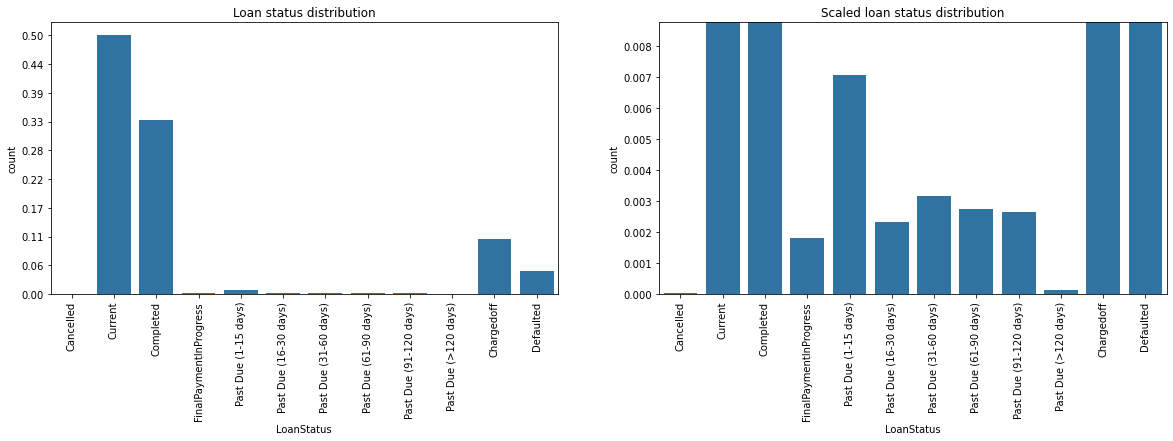

In [14]:
# Rather than just the counts, I'd like to visualilse the data by proportions
n_customers = df.shape[0]
status_counts = df['LoanStatus'].value_counts()
max_prop = status_counts.max() / n_customers

tick_points = np.linspace(0, max_prop, 10)
tick_labels = [f'{x:.2f}' for x in tick_points]

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
a = sb.countplot(data=df, x='LoanStatus', color=color_stream[0])
plt.xticks(rotation=90)
plt.yticks(tick_points*n_customers, tick_labels)
plt.title('Loan status distribution')

# Let's zoom in a bit to visualise how the smaller values compare to each other
m_prop = 1000 / n_customers
t_points = np.arange(0, m_prop, 0.001)
t_labels = [f'{x:.3f}' for x in t_points]

plt.subplot(1, 2, 2)
sb.countplot(data=df, x='LoanStatus', color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.yticks(t_points*n_customers, t_labels)
plt.ylim(0,1000)
plt.title('Scaled loan status distribution')
plt.show()

#### Observation
The bulk of the data consists of current, completed, chargedoff and defaulted loans. The other variations are contained in a very small proportion of the dataset.

Let's visualise the distribution of the loan term

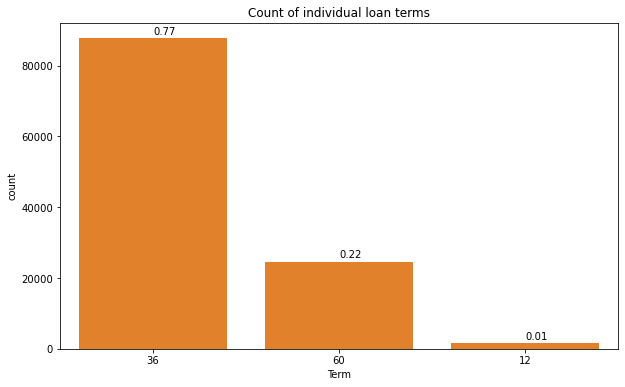

In [15]:
plt.figure(figsize=(10, 6))
term_counts = df['Term'].value_counts()
term_order = term_counts.index

sb.countplot(data=df, x='Term', color=sb.color_palette()[1], order=term_order)
for idx, term in enumerate(term_counts):
    put_str = f'{term/n_customers:.2f}'
    plt.text(idx, term+2000, put_str, va='center')
plt.title('Count of individual loan terms');

#### Observation
The dominant loan term in the data is 36 months.

Let's take a look at the loan amount distribution

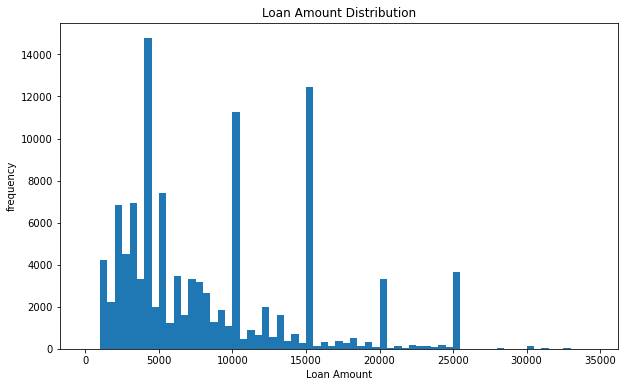

In [16]:
plt.figure(figsize=(10, 6))
la_max = df['LoanOriginalAmount'].max()
bins = np.arange(0, la_max, 500)
plt.hist(df['LoanOriginalAmount'], bins=bins);
plt.xlabel('Loan Amount')
plt.ylabel('frequency')
plt.title('Loan Amount Distribution');

#### Observation
The distribution congests at the left and becomes scarce down the right. However, there are spikes at intervals of 5000 (e.g. 5000, 10000, 15000, 20000, 25000)

The Listing category my hold interesting insights too.

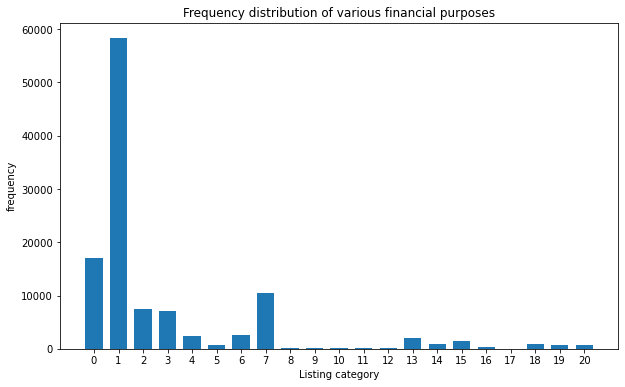

In [17]:
plt.figure(figsize=(10, 6))
lc_max = df['ListingCategory (numeric)'].max()
bin_edges = np.arange(-0.5, lc_max+1.5, 1)
plt.hist(df['ListingCategory (numeric)'], rwidth=0.7, bins=bin_edges)
plt.xticks(np.arange(0, lc_max+1, 1));
plt.xlabel('Listing category')
plt.ylabel('frequency')
plt.title('Frequency distribution of various financial purposes');

#### Observation
the highest spike is at 1 which corresponds to `loan consolidation`. The second highest is 0 which corresponds to `not available`. The next point is 7 which corresponds to `other`. This feature seems uninteresting, but then considerable chunks fall into the 2 and 3 marks which correspond to `home improvement` and `business` respectively. It's reasonable that a loan firm would be more inclined to give out loans for these two reasons as opposed to `boat` purchase which is represented by the 9 mark.

Now let's take a look at the Employment Status

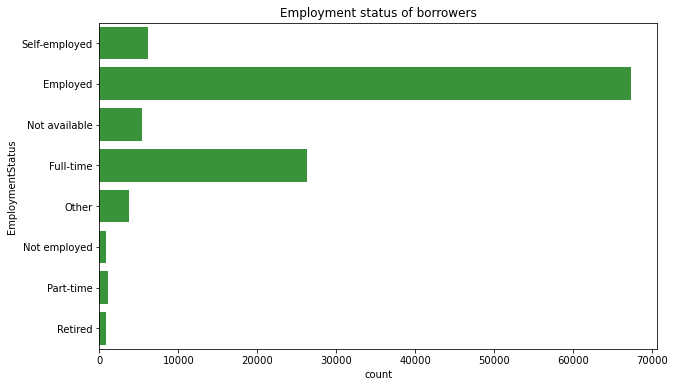

In [18]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, y='EmploymentStatus', color=color_stream[2])
plt.title('Employment status of borrowers')
plt.show()

#### Observation
The dataset is most populated with individuals who are guranteed of a monthly income.

Let's have a look at the Employment Status Duration

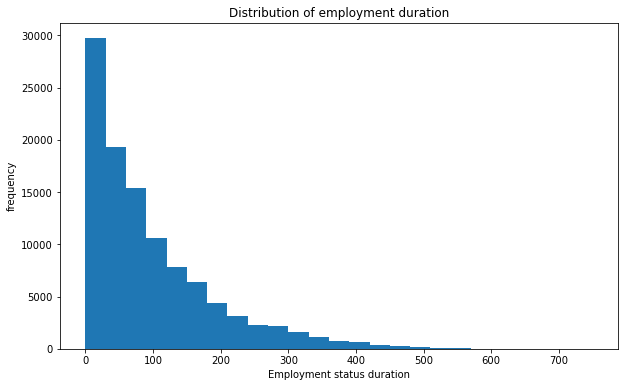

In [19]:
plt.figure(figsize=(10, 6))
emax = df['EmploymentStatusDuration'].max()
bins = np.arange(0, emax+5, 30)
plt.hist(df['EmploymentStatusDuration'], bins=bins);
plt.xlabel('Employment status duration')
plt.ylabel('frequency')
plt.title('Distribution of employment duration');

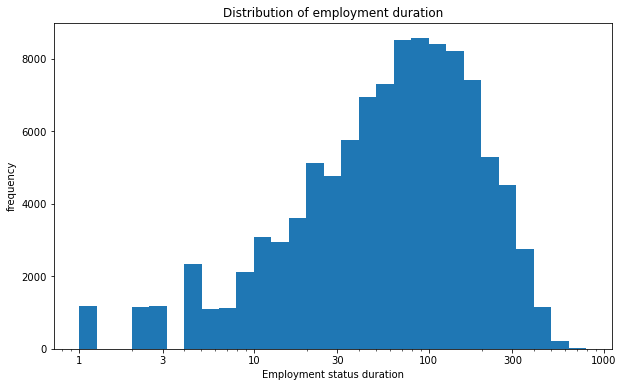

In [20]:
# The distribution is skewed towards the left with a long tail at point 0. Let's plot using a log scale instead
plt.figure(figsize=(10, 6))
emax = np.log10(df['EmploymentStatusDuration'].max())
ticks = [1, 3, 10, 30, 100, 300, 1000]
ticks_labels = [f'{x}' for x in ticks]

bins = 10** np.arange(0, emax+0.1, 0.1)
plt.hist(df['EmploymentStatusDuration'], bins=bins)
plt.xscale('log')
plt.xticks(ticks, ticks_labels)
plt.xlabel('Employment status duration')
plt.ylabel('frequency')
plt.title('Distribution of employment duration');

#### Observation
The Employment status duration now has a unimodal normal distribution. The peak is observed just before the 100 month value

Now let's look at the Debt to income ratio

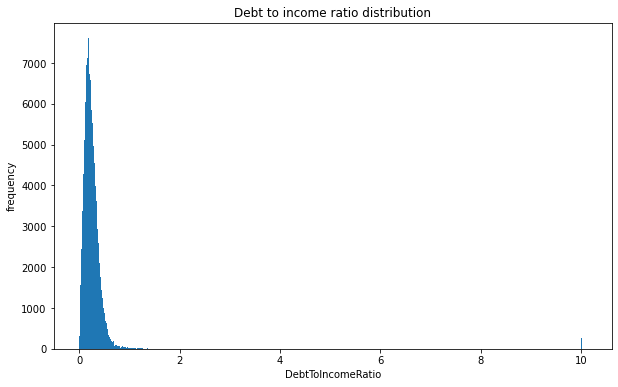

In [21]:
plt.figure(figsize=(10, 6))
dr_max = df['DebtToIncomeRatio'].max()
bins = np.arange(0, dr_max+0.1, 0.02)
plt.hist(df['DebtToIncomeRatio'], bins=bins);
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('frequency')
plt.title('Debt to income ratio distribution');

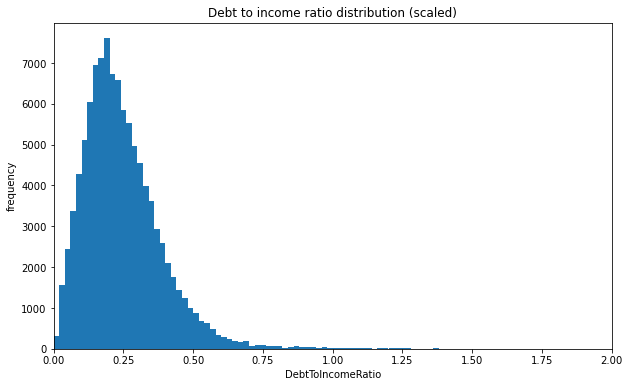

In [22]:
# There's a lot of outlyers towards the right. We can zoom in to get a more appreciable distribution of the data
plt.figure(figsize=(10, 6))
dr_max = df['DebtToIncomeRatio'].max()
bins = np.arange(0, dr_max+0.1, 0.02)
plt.hist(df['DebtToIncomeRatio'], bins=bins);
plt.xlim(0,2);
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('frequency')
plt.title('Debt to income ratio distribution (scaled)');

#### Observation
The debt to income ratio distribution peaks somewhere around 0.2. It is very much skewed to the right

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the interest rate information, both `BorrowerRate` and `BorrowerAPR` initially appear to ba a normal distribution until a sudden spike in frequency is observed at about 0.32 for the formeer and 0.36 for the latter.

> The distribution for `LoanOriginalAmount` congests at the left and becomes scarce down the right. However, there are spikes at intervals of 5000 (e.g. 5000, 10000, 15000, 20000, 25000)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The bulk of the `LoanStatus` data consists of current, completed, chargedoff and defaulted loans. The other variations are contained in a very small proportion of the dataset.

> The distribution for the `EmploymentStatusDuration` is skewed to the left with a long tail at point 0. After performing a log transform, the `EmploymentStatusDuration` now has a unimodal normal distribution. The peak is observed just before the 100 month value

> The distribution for `DebtToIncomeRatio` is very much skewed to the right so I've had to scale the plot to focus on the points of interest

## Bivariate Exploration

> In this section, I'll investigate relationships between pairs of variables in the
data. I'll also make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Is home ownership a deciding factor to how much money the company is willing to lend to a borrower?

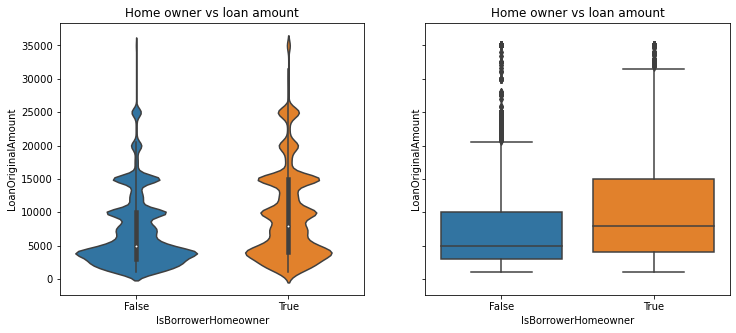

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

sb.violinplot(data=df, x='IsBorrowerHomeowner', y='LoanOriginalAmount', ax=ax[0])
plt.sca(ax[0])
plt.title('Home owner vs loan amount')
sb.boxplot(data=df, x='IsBorrowerHomeowner', y='LoanOriginalAmount', ax=ax[1])
plt.sca(ax[1])
plt.title('Home owner vs loan amount');

#### Observation
The violin plot reveals something interesting - Borrowers without homes get the bulk of the loan for loan amounts around the 5000 (lower loan amounts) mark. Things seem evenly matched at the 10000 mark but as we proceed higher up the scale,  just above the 10000 mark we see that most of the loans given is designated to borrowers with homes (observe the 15000, 20000, 25000 marks. there's even a little bump at the 35000 mark for the borrower with home category). The box plot shows the median for the distribution of borrowers without homes is much lower than that for borrowers with homes, suggesting a more uniform distribution in the latter than in the former.

in other words, the distribution for borrowers without homes is more congested at the lower part of the scale and very much skewed higher up the scale while the distribution for borrowers with homes is relatively more evenly distributed atleast when compared to the former, although still a little bit skewed higher up the scale.

One could say borrowers with homes are more eligible for higher loan amounts. A facet grid could support this argument.

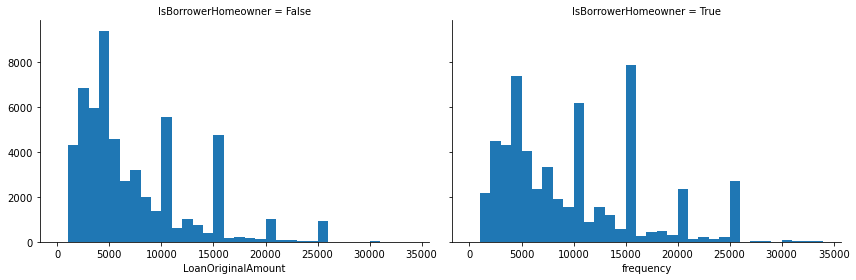

In [24]:
la_max = df['LoanOriginalAmount'].max()
bins = np.arange(0, la_max, 1000)
g = sb.FacetGrid(data=df, col='IsBorrowerHomeowner', height=4, aspect=1.5)
g.map(plt.hist, 'LoanOriginalAmount', bins=bins)
plt.xlabel('frequency');

This Grid oh histograms only reiterated my previous observations.

Are credit grade and prosper rating deciding factors to how much money the company is willing to lend to a borrower?

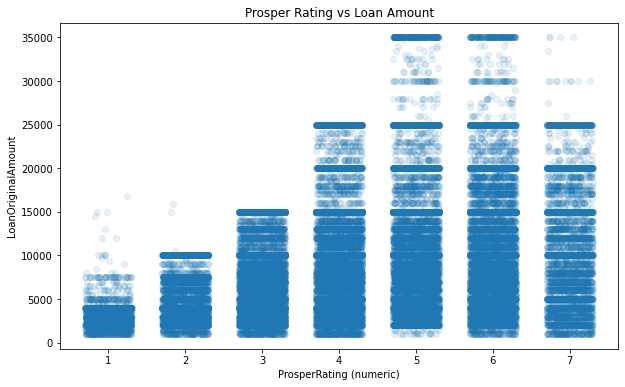

In [25]:
plt.figure(figsize=(10, 6))
sb.regplot(data=df, x='ProsperRating (numeric)', y='LoanOriginalAmount', fit_reg=False,
           x_jitter=0.3, scatter_kws={'alpha':1/10})
plt.title('Prosper Rating vs Loan Amount');

#### Observation
The Plot shows that the higher the prosper rating of a borrower, the higher the loan amount available to them for borrowing

`ProsperRating` does not account for loans taken before 2009, those are represented in `CreditGrade`. Let's merge these two feature and redo the plot and see if there is any change in the overall distribution

In [26]:
def creditToNumeric(dts):
    '''
    Encodes alpha categorical values with numeric values suitable for a scatter plot
    '''
    val_dict = {'AA':7, 'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'HR':1}
    return val_dict[dts]

def mergeCols(dts):
    if dts['CreditGrade na']:
        return dts['CreditGrade (numeric)']
    elif dts['ProsperRating na']:
        return dts['ProsperRating (numeric)']
    else:
        return np.nan

df['CreditGrade (numeric)'] = df['CreditGrade'].apply(creditToNumeric)
df['CreditGrade (numeric)'] = df['CreditGrade (numeric)'].astype('float64')
df['CreditGrade na'] = df['CreditGrade (numeric)'].notna()
df['ProsperRating na'] = df['ProsperRating (numeric)'].notna()

df['ProsperCreditMerge'] = df.loc[:,['ProsperRating (numeric)', 'CreditGrade (numeric)', 'CreditGrade na',
                                     'ProsperRating na']].apply(mergeCols, axis=1)

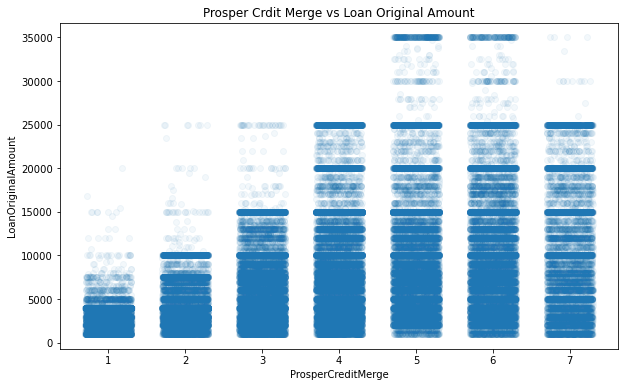

In [27]:
plt.figure(figsize=(10, 6))
sb.regplot(data=df, x='ProsperCreditMerge', y='LoanOriginalAmount', fit_reg=False,
           x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.title('Prosper Crdit Merge vs Loan Original Amount');

#### Observation
The distribution remains consistent after the merger

Is the prosper rating a deciding factor for borrower rate

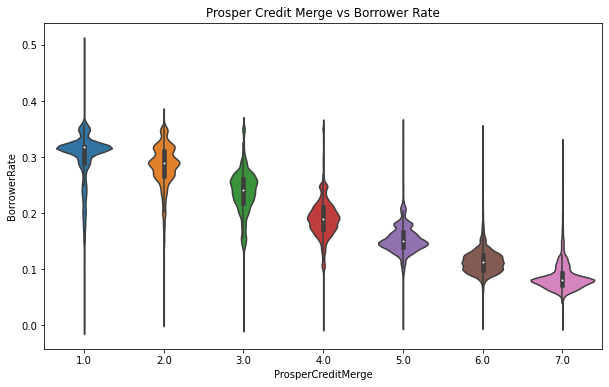

In [28]:
plt.figure(figsize=(10, 6))
sb.violinplot(data=df, x='ProsperCreditMerge', y='BorrowerRate')
plt.title('Prosper Credit Merge vs Borrower Rate');

#### Observation
The violin plot shows clearly that borrowers with higher Prospr/Credit rating generally get more favourable terms on loans as is expected.

This plot might be misleading because term is not taken into account. That will be my first consideration in the multivariate plot

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrowers without homes get the bulk of the loan for loan amounts around the 5000 (lower loan amounts) mark. Things seem evenly matched at the 10000 mark but as we proceed higher up the scale,  just above the 10000 mark we see that most of the loans given is designated to borrowers with homes (observe the 15000, 20000, 25000 marks.

> Borrowers with higher Prosper/Credit rating generally get more favourable terms on loans as is expected.

> The higher the prosper rating of a borrower, the higher the loan amount available to them for borrowing.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.


Let's replicate the previous plot but hue by `Term`

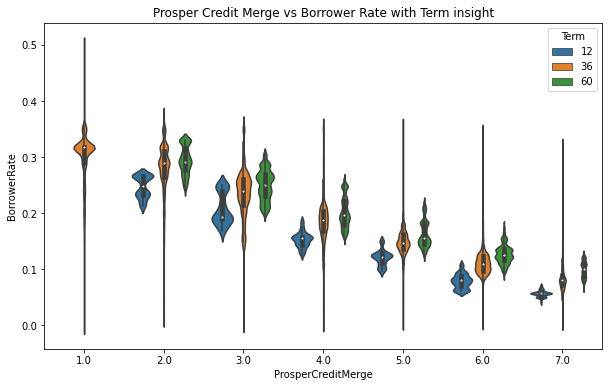

In [29]:
plt.figure(figsize=(10, 6))
sb.violinplot(data=df, x='ProsperCreditMerge', y='BorrowerRate', hue='Term')
plt.title('Prosper Credit Merge vs Borrower Rate with Term insight');

It's not so pretty. Let's  visualise using an adaptive bar chart instead

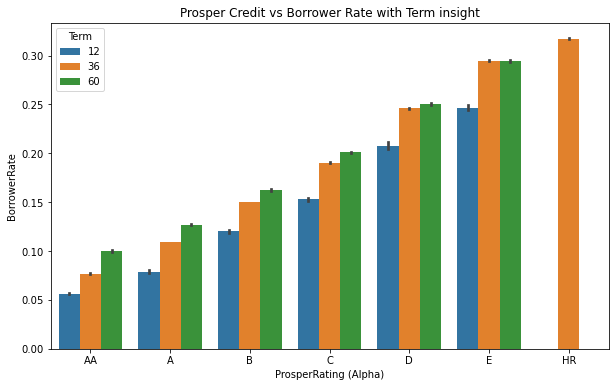

In [30]:
plt.figure(figsize=(10, 6))
sb.barplot(data=df, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term')
plt.title('Prosper Credit vs Borrower Rate with Term insight');

#### Observation

Just as we observed in the previous section, the graph shows that borrowers with better ratings generally recieve better rate offers.

Let's see the relationship between `DebtToIncomeRatio` and `BorrowerRate` and how the `Term` affects this relationship.

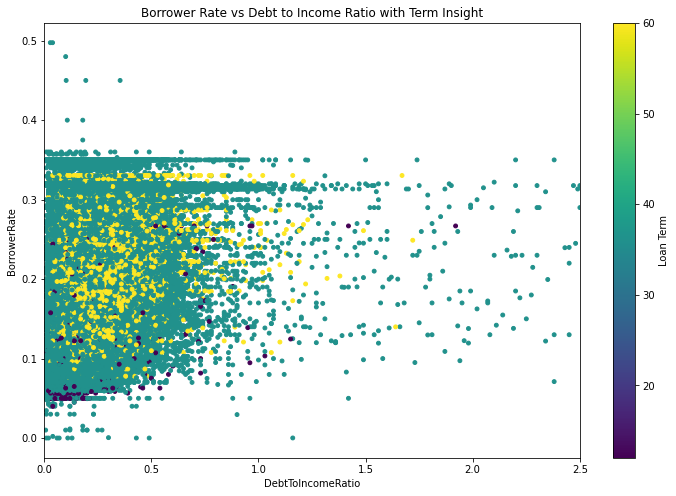

In [31]:
plt.figure(figsize=(12, 8))
a = plt.scatter(data=df, x='DebtToIncomeRatio', y='BorrowerRate', c='Term', s=15)
plt.xlim(0,2.5)
plt.colorbar(label='Loan Term')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerRate')
plt.title('Borrower Rate vs Debt to Income Ratio with Term Insight');

#### Observation
The plot definitely looks to be in dissaray. There doesn't seem to ba a clear relationship however, the graph subtlely suggests that the 12 months loan term attracts lower rates.

Let's reiterate the above plot between `DebtToIncomeRatio` and `BorrowerRate` but this time let's see how the `ProsperScore` affects this relationship.

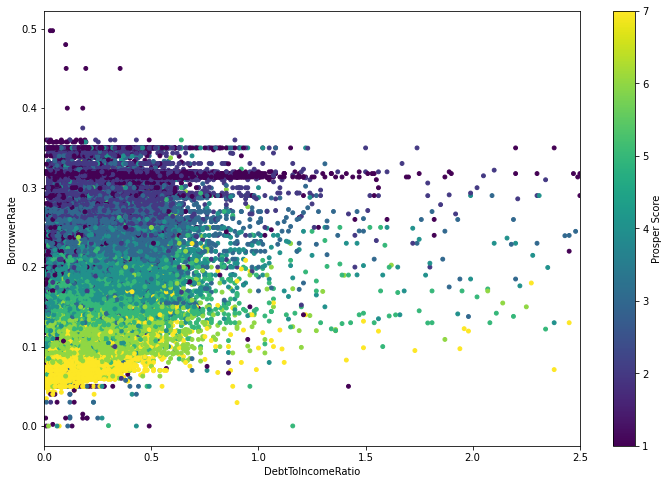

In [110]:
plt.figure(figsize=(12, 8))
a = plt.scatter(data=df, x='DebtToIncomeRatio', y='BorrowerRate', c='ProsperCreditMerge', s=15)
plt.xlim(0,2.5)
plt.colorbar(label='Prosper Score')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('BorrowerRate');

#### Observation
This time the ralationship between `ProsperScore` and `BorrowerRate` is much clearer. As we've seen before, The higher the borrower rating, the more favourable rate they are likely to get.

Let's see the distribution of Prosper Rating against Loan Amount by Home Ownership Status

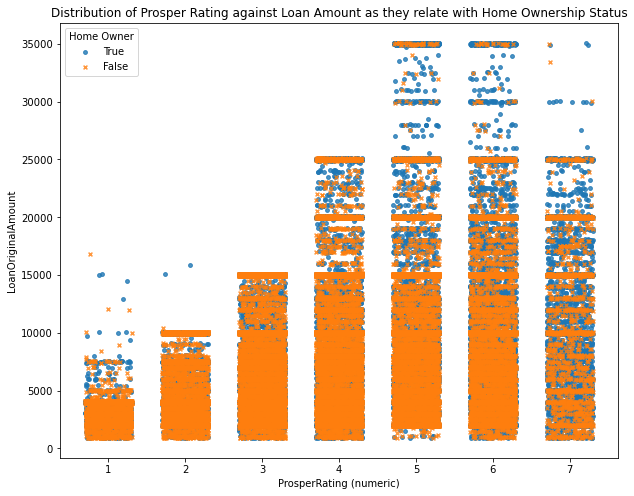

In [120]:
plt.figure(figsize=(10, 8))
markers = [[True, 'o'], [False, 'x']]
for val, marker in markers:
    home_df = df.query(f'IsBorrowerHomeowner == {val}')
    sb.regplot(data=home_df, x='ProsperRating (numeric)', y='LoanOriginalAmount',
               fit_reg=False, x_jitter=0.3, y_jitter=100, marker=marker, scatter_kws={'s':15});
    
plt.legend(['True', 'False'], title='Home Owner')
plt.title('Distribution of Prosper Rating against Loan Amount as they relate with Home Ownership Status');

#### Observation
At first distribution seems even between homeowners and non-homeowners but after about 20,000, home owners seem to be given preference, ie. home owners are more eligible for higher loan amounts.

We can better visualise this in a facet grid of box plots.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


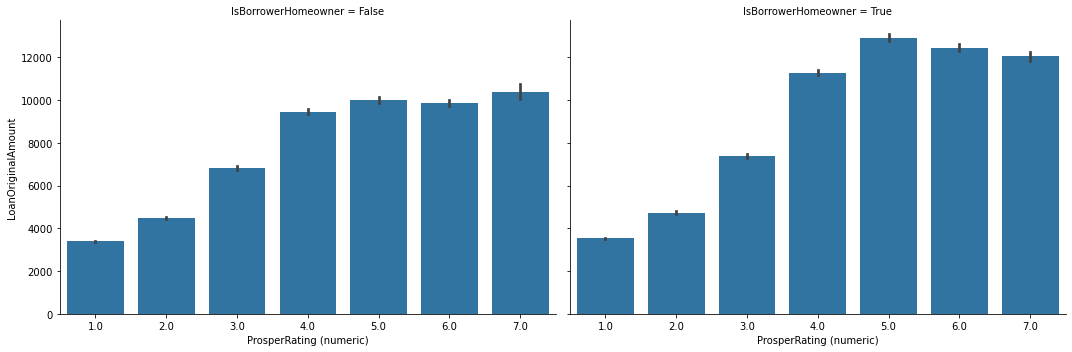

In [118]:
f = sb.FacetGrid(data=df, col='IsBorrowerHomeowner', height=5, aspect=1.5)
f.map(sb.barplot, 'ProsperRating (numeric)', 'LoanOriginalAmount');

#### Observation
Our observation is hence valid. Homeowners will generally be more eligible for higher loans than non-homeowners. This observation especially stands with borrower of rating 4 (C) or higher.

Let's see the relationship between `LoanOriginalAmount`, `BorrowerRate` and `ProsperCreditMerge`

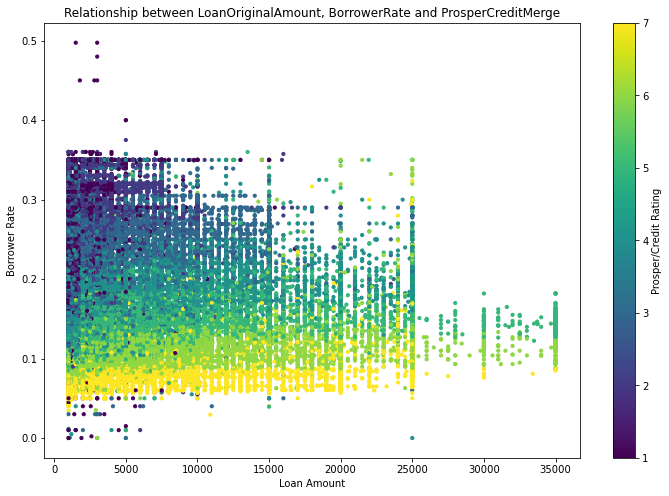

In [125]:
plt.figure(figsize=(12, 8))

plt.scatter(data=df, x='LoanOriginalAmount', y='BorrowerRate', c='ProsperCreditMerge', s=10)
plt.colorbar(label='Prosper/Credit Rating')
plt.xlabel('Loan Amount')
plt.ylabel('Borrower Rate')
plt.title('Relationship between LoanOriginalAmount, BorrowerRate and ProsperCreditMerge');

#### Observation
This is an interesting plot. It shows again what we have observed recurrently - the higher the borrower prosper rating, the more favourable the borrower rate. It also shows that access to funds over 20,000 is restricted to Borrowers with ratings above 4 (C).

Close to the origin of the graph we observe some strange occurrences where borrowers with poor rating still get the best rates even ahead of those with the best ratings. This seems like an anomaly but it's worth looking into.

In [126]:
# let's isolate these anomalies into a seperate dataset
curious = df.loc[(df['BorrowerRate'] < 0.1) & (df['ProsperCreditMerge'] < 3)]
curious.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditGrade (numeric),ProsperCreditMerge
count,125.000000,125.0,125.000000,125.000000,125.000000,0.0,0.0,0.0,0.0,0.0,...,125.000000,125.000000,125.000000,125.0,125.000000,125.000000,125.00000,125.00000,125.000000,125.000000
mean,155631.152000,36.0,0.078242,0.063882,0.053962,NaN,NaN,NaN,NaN,NaN,...,711.484480,708.528640,2.610640,1.0,0.184000,0.264000,694.36000,3.04800,1.232000,1.232000
std,114781.878712,0.0,0.026394,0.025644,0.027320,NaN,NaN,NaN,NaN,NaN,...,1397.237715,1398.629353,13.629998,0.0,0.464619,0.510281,1557.04007,4.36972,0.423808,0.423808
min,2374.000000,36.0,0.008640,0.000000,-0.010000,NaN,NaN,NaN,NaN,NaN,...,0.000000,-15.360000,0.000000,1.0,0.000000,0.000000,0.00000,1.00000,1.000000,1.000000
25%,56219.000000,36.0,0.064250,0.050000,0.040000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,1.00000,1.000000,1.000000
50%,119784.000000,36.0,0.083700,0.070000,0.056700,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,1.00000,1.000000,1.000000
75%,252958.000000,36.0,0.097280,0.087100,0.077500,NaN,NaN,NaN,NaN,NaN,...,875.550000,875.550000,0.000000,1.0,0.000000,0.000000,0.00000,2.00000,1.000000,1.000000
max,409519.000000,36.0,0.118530,0.099900,0.094500,NaN,NaN,NaN,NaN,NaN,...,7500.000000,7500.000000,100.000000,1.0,3.000000,3.000000,7500.00000,21.00000,2.000000,2.000000


In [127]:
curious.shape

(125, 85)

only 125 entries of the entire dataset fall in this anomalous category. Let's check for further insight

In [123]:
curious.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 790 to 111692
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   ListingKey                           125 non-null    object  
 1   ListingNumber                        125 non-null    int64   
 2   ListingCreationDate                  125 non-null    object  
 3   CreditGrade                          125 non-null    category
 4   Term                                 125 non-null    int64   
 5   LoanStatus                           125 non-null    category
 6   ClosedDate                           125 non-null    object  
 7   BorrowerAPR                          125 non-null    float64 
 8   BorrowerRate                         125 non-null    float64 
 9   LenderYield                          125 non-null    float64 
 10  EstimatedEffectiveYield              0 non-null      float64 
 11  EstimatedLoss 

#### Observation
Interestingly, all of these anomalous entries have `CreditGrade` (pre 2009 rating) values and no `ProsperRating` (post 2009 rating) values which means further seperating the dataset into two distinct categories - pre2009 and post2009 - might provide further insight.

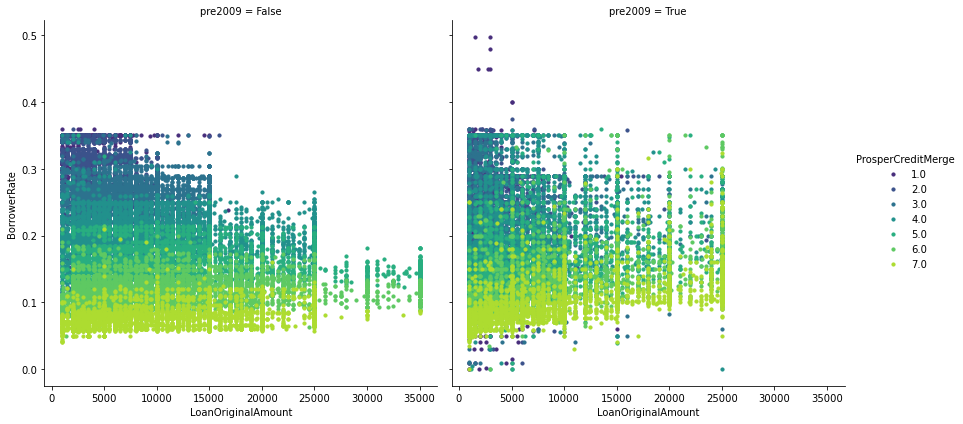

In [147]:
df['pre2009'] = df['LoanOriginationDate'] <= '2009-July'

g = sb.FacetGrid(data=df, col='pre2009', height=6, hue='ProsperCreditMerge', palette='viridis')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', s=10)
g.add_legend();

#### Observation
We observe from this plot that the borrower `Rating` became a stronger deciding factor for the `BorrowerRate` after July 2009 as opposed to before this date. Also, after July 2009, the more money a person borrows the lesser the rate they are likely to get. This was not necessarily the case before July 2009.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Just as we observed in the previous section, the graph shows that borrowers with better ratings generally recieve better rate offers.

> At first distribution seems even between homeowners and non-homeowners but after about 20,000, home owners seem to be given preference, ie. home owners are more eligible for higher loan amounts.

> We observe from this plot that the borrower `Rating` became a stronger deciding factor for the `BorrowerRate` after July 2009 as opposed to before this date. Also, after July 2009, the more money a person borrows the lesser the rate they are likely to get. This was not necessarily the case before July 2009.
